![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [291]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [292]:
# Load the women's and men's results datasets
women_df = pd.read_csv("women_results.csv")
men_df = pd.read_csv("men_results.csv")

In [293]:
# Explore the women's data
women_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [294]:
# Explore the men's data
men_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [295]:
# Filter for FIFA World Cup matches after 2002-01-01
filtered_women_df = women_df[
    (women_df["tournament"] == "FIFA World Cup") & (pd.to_datetime(women_df["date"]) > "2002-01-01")
]
filtered_men_df = men_df[
    (men_df["tournament"] == "FIFA World Cup") & (pd.to_datetime(men_df["date"]) > "2002-01-01")
]

In [296]:
filtered_women_df["total_goals"] = filtered_women_df["home_score"] + filtered_women_df["away_score"]
filtered_men_df["total_goals"] = filtered_men_df["home_score"] + filtered_men_df["away_score"]

In [297]:
filtered_men_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,3
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


In [298]:
filtered_men_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,384.0,34629.875000,6566.923215,25164.0,28769.75,34557.0,40385.25,44352.0
home_score,384.0,1.375000,1.328538,0.0,0.00,1.0,2.00,8.0
away_score,384.0,1.138021,1.107398,0.0,0.00,1.0,2.00,7.0
total_goals,384.0,2.513021,1.652544,0.0,1.00,2.0,3.00,8.0


In [299]:
filtered_women_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,3094.485,1010.682192,1600.0,2155.75,3429.5,4418.25,4469.0
home_score,200.0,1.805,1.937977,0.0,1.00,1.0,2.00,13.0
away_score,200.0,1.175,1.289453,0.0,0.00,1.0,2.00,7.0
total_goals,200.0,2.980,2.022387,0.0,2.00,3.0,4.00,13.0


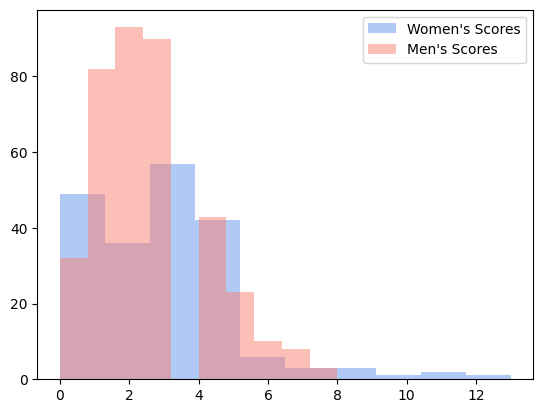

In [300]:
# Plot histograms
plt.hist(filtered_women_df["total_goals"], alpha=0.5, color="cornflowerblue", label="Women's Scores")
plt.hist(filtered_men_df["total_goals"], alpha=0.5, color="salmon", label="Men's Scores")
plt.legend()
plt.show()

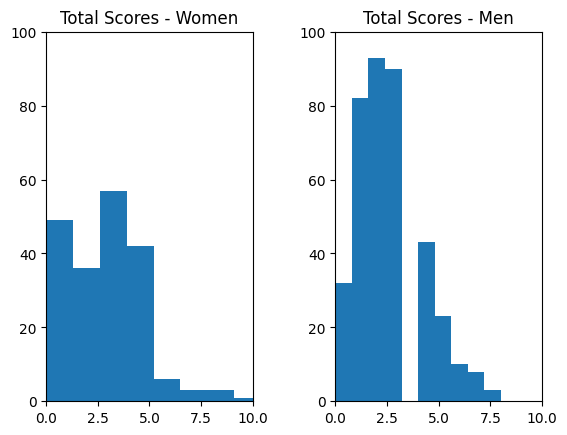

In [310]:
# Visualize the distributions of goals scored using histograms

fig, axes = plt.subplots(1, 2)

axes[0].hist(filtered_women_df["total_goals"])
axes[0].set_title("Total Scores - Women")
axes[0].set_xlim([0, 10])
axes[0].set_ylim([0, 100])

axes[1].hist(filtered_men_df["total_goals"])
axes[1].set_title("Total Scores - Men")
axes[1].set_xlim([0, 10])
axes[1].set_ylim([0, 100])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

From the plots we can see that both distributions of scores are right-skewed.

In [302]:
# Check the length of the datasets
print(f"Number of samples in women's group is: {len(filtered_women_df)}")
print(f"Number of samples in men's group is: {len(filtered_men_df)}")

Number of samples in women's group is: 200
Number of samples in men's group is: 384


In [303]:
# Using Shapiro-Wilk test to confirm if distribution is normal
stats.shapiro(filtered_women_df["total_goals"])

ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)

Since the p-value of the above test is much smaller than the significance level of 0.1, we can reject the null hypothesis and conclude that home scores for the women’s teams are not normally distributed.

In [304]:
# Using Shapiro-Wilk test to confirm if distribution is normal
stats.shapiro(filtered_men_df["total_goals"])

ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)

Since the p-value of the above test is much smaller than the significance level of 0.1, we can reject the null hypothesis and conclude that home scores for the men’s teams are not normally distributed.

In [305]:
# Since the distributions of scores are right-skewed, the appropriate test to use is a non-parametric test like the Wilcoxon-Mann-Whitney test.
result = mannwhitneyu(filtered_women_df["total_goals"], filtered_men_df["total_goals"], alternative="greater")

In [306]:
print(result)

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


In [312]:
# Determine whether to reject or fail to reject the null hypothesis
if result.pvalue <= 0.1:
    result_dict = {"p_val": result.pvalue, "result": "reject"}
else:
    result_dict = {"p_val": result.pvalue, "result": "fail to reject"}

In [311]:
# Print the results
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


Since the p value is lower than the alpha or significance level of 0.1, we say that we reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's.